In [ ]:
'''
For simplicity and practice purposes, 
the dataset is not split into training and test sets in this notebook.
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set_theme(font_scale=1.3)
np.random.seed(42)


In [2]:
all_data = load_iris(as_frame=True)

df = all_data.frame

df.columns = df.columns.str.replace(r' \(cm\)', '', regex=True) \
                       .str.replace(' ', '_')

feature_names = df.columns[:-1].tolist()
target_names = all_data.target_names

print(f'Samples number: {len(df)}')
print(f'Data shape: {df.shape}')
print(f'Future names: {feature_names}')
print(f'Iris categories (target names): {target_names}')
df.head()

Samples number: 150
Data shape: (150, 5)
Future names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Iris categories (target names): ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


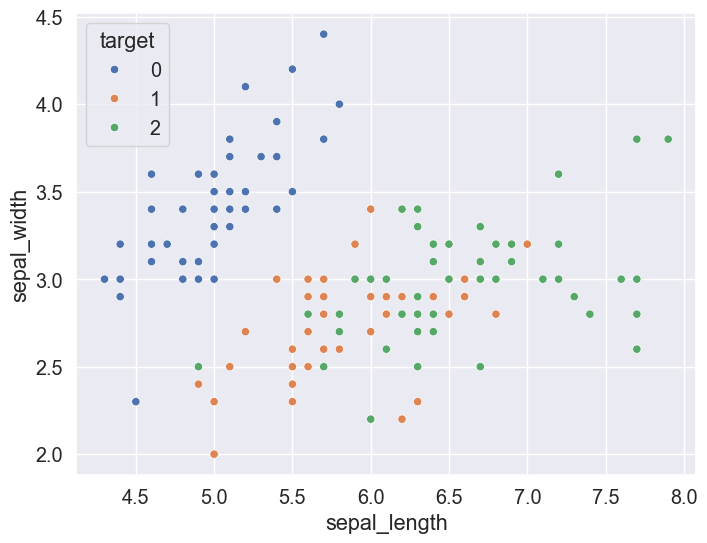

In [3]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(
    data = df,
    x='sepal_length',
    y='sepal_width',
    hue='target',
    legend='full',
    palette=sns.color_palette()[:3]
)

plt.show()

In [4]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
data = data.values
target = target.values.astype('int16')

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

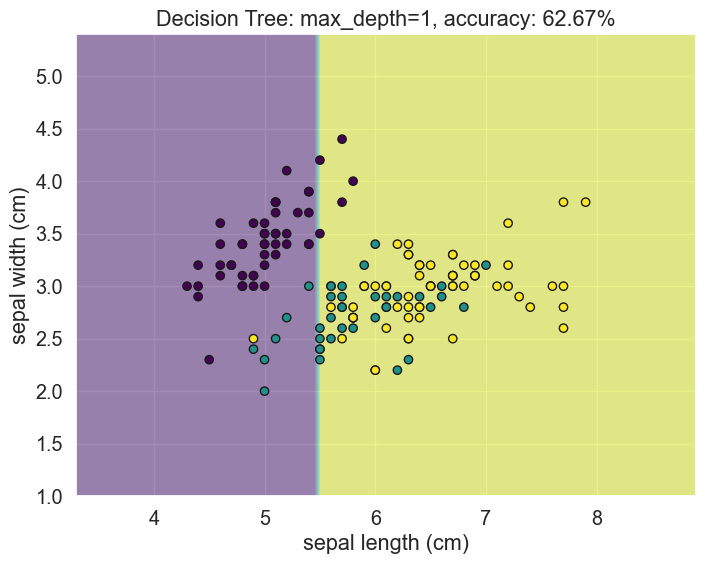

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
ax = plt.gca() # Get the current axes

DecisionBoundaryDisplay.from_estimator(
    classifier,
    data,
    ax=ax,
    response_method="predict", # Use "predict" for classification
    cmap='viridis',            # A standard, simpler colormap
    alpha=0.5,                 # Make regions semi-transparent
    xlabel='sepal length (cm)',
    ylabel='sepal width (cm)'
)


plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', edgecolors='k')

plt.title(f'Decision Tree: max_depth=1, accuracy: {acc * 100:.2f}%')

plt.show()

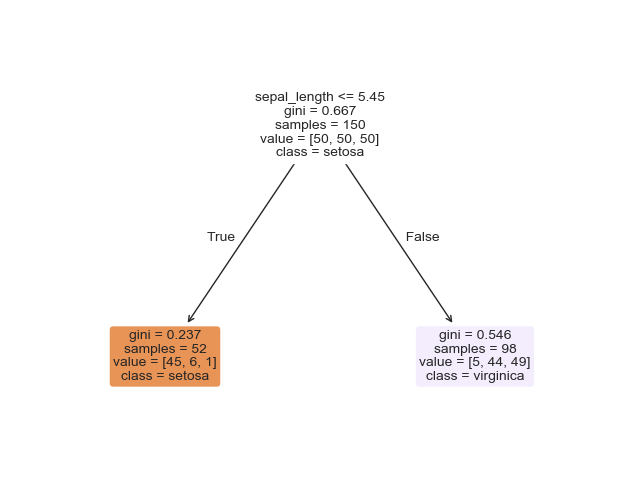

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6)) 

plot_tree(classifier,
          feature_names=feature_names[:2],
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)

plt.show()